Heavily borrows from http://www.science.smith.edu/~jcrouser/SDS293/labs/

In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
hitters = pd.read_csv('../datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

hitters = hitters.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]] # push salary at the end

hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 1]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 1]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 1]

X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

# 6.6.1 Ridge Regression

In [3]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

grid = 10 ** np.linspace(3,-2,100)

ridge_model = Ridge(normalize=True)
coefs = []

for a in grid:
    ridge_model.set_params(alpha=a)
    ridge_model.fit(X, y)
    coefs.append(ridge_model.coef_)

In [4]:
grid[49], 
pd.Series(coefs[49], index=X.columns)

AtBat                    0.10768
Hits                     0.48869
HmRun                    1.31796
Runs                     0.75786
RBI                      0.73100
Walks                    1.00938
Years                    2.78921
CAtBat                   0.00930
CHits                    0.03704
CHmRun                   0.27235
CRuns                    0.07422
CRBI                     0.07695
CWalks                   0.06917
League                   6.81267
Division               -33.62792
PutOuts                  0.07705
Assists                  0.01026
Errors                  -0.30280
NewLeague                5.36069
dtype: float64

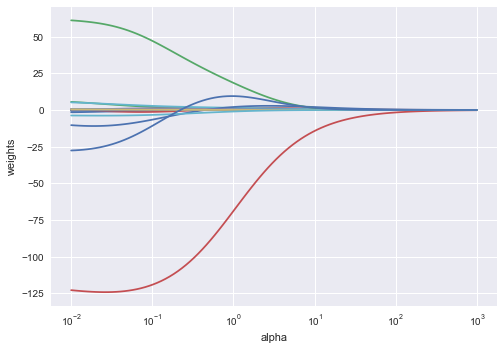

In [5]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [7]:
# "good" ridge model
ridge2 = Ridge(alpha=4, normalize=True)
ridge2_fit = ridge2.fit(X_train, y_train)
y_pred2 = ridge2.predict(X_test)

print(pd.Series(ridge2_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred2))

AtBat                    0.09866
Hits                     0.44609
HmRun                    1.41211
Runs                     0.66077
RBI                      0.84340
Walks                    1.00847
Years                    2.77988
CAtBat                   0.00824
CHits                    0.03415
CHmRun                   0.26863
CRuns                    0.07041
CRBI                     0.07006
CWalks                   0.08279
League                   4.24105
Division               -30.76888
PutOuts                  0.10475
Assists                 -0.00374
Errors                   0.26836
NewLeague                4.12347
dtype: float64
MSE: 106216.52238005561


In [8]:
# very high lambda
ridge3 = Ridge(alpha=1e10, normalize=True)
ridge3_fit = ridge3.fit(X_train, y_train)
y_pred3 = ridge3.predict(X_test)

print(pd.Series(ridge3_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred3))

AtBat                    0.00000
Hits                     0.00000
HmRun                    0.00000
Runs                     0.00000
RBI                      0.00000
Walks                    0.00000
Years                    0.00000
CAtBat                   0.00000
CHits                    0.00000
CHmRun                   0.00000
CRuns                    0.00000
CRBI                     0.00000
CWalks                   0.00000
League                  -0.00000
Division                -0.00000
PutOuts                  0.00000
Assists                 -0.00000
Errors                   0.00000
NewLeague               -0.00000
dtype: float64
MSE: 172862.23580379886


In [9]:
# lambda=0 -> OLS
ridge4 = Ridge(alpha=0, normalize=True)
ridge4_fit = ridge4.fit(X_train, y_train)
y_pred4 = ridge4.predict(X_test)

print(pd.Series(ridge4_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred4))

AtBat                   -1.82111
Hits                     4.25916
HmRun                   -4.77340
Runs                    -0.03876
RBI                      3.98458
Walks                    3.47013
Years                    9.49824
CAtBat                  -0.60513
CHits                    2.17498
CHmRun                   2.97931
CRuns                    0.26636
CRBI                    -0.59846
CWalks                   0.17138
League                 133.74316
Division              -113.74387
PutOuts                  0.42106
Assists                  0.46438
Errors                  -6.02458
NewLeague              -81.92776
dtype: float64
MSE: 116690.46856660453


In [10]:
# cross validated ridge (10-fold)
ridge_cv = RidgeCV(alphas=grid, normalize=True, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

0.5857020818056667

In [11]:
# cv_lambda
ridge5 = Ridge(alpha=ridge_cv.alpha_, normalize=True)
ridge5_fit = ridge5.fit(X_train, y_train)
y_pred5 = ridge5.predict(X_test)

print(pd.Series(ridge5_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred5))

AtBat                   -0.01054
Hits                     0.85783
HmRun                   -0.25559
Runs                     0.72445
RBI                      1.31289
Walks                    2.08091
Years                    1.24184
CAtBat                   0.00674
CHits                    0.05185
CHmRun                   0.50997
CRuns                    0.10642
CRBI                     0.12755
CWalks                   0.09931
League                  18.74612
Division               -91.61325
PutOuts                  0.27850
Assists                 -0.01733
Errors                  -0.30212
NewLeague                9.99140
dtype: float64
MSE: 99805.36301929558


# 6.6.2 The Lasso

In [12]:
from sklearn.preprocessing import scale

grid = 10 ** np.linspace(3,-2,100)

lasso_model = Lasso(normalize=True, max_iter=10000) # max_iter=10000 for removing ConvergenceWarning
coefs = []

for a in grid:
    lasso_model.set_params(alpha=a)
    lasso_model.fit(scale(X_train), y_train)
    coefs.append(lasso_model.coef_)

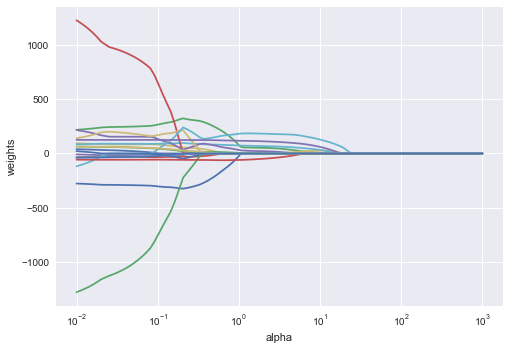

In [13]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [14]:
lasso_cv = LassoCV(alphas=grid, max_iter=100000, normalize=True, cv=10)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

2.364489412645407

In [15]:
lasso2 = Lasso(alpha=lasso_cv.alpha_, normalize=True, max_iter=10000)
lasso2_fit = lasso2.fit(X_train, y_train)
y_pred2 = lasso2_fit.predict(X_test)

print(pd.Series(lasso2_fit.coef_, index=X.columns))
print('MSE:', mean_squared_error(y_test, y_pred2))

AtBat                    0.00000
Hits                     1.08587
HmRun                    0.00000
Runs                     0.00000
RBI                      0.00000
Walks                    2.91350
Years                    0.00000
CAtBat                   0.00000
CHits                    0.00000
CHmRun                   0.22134
CRuns                    0.00000
CRBI                     0.51447
CWalks                   0.00000
League                   0.00000
Division               -89.91394
PutOuts                  0.36912
Assists                 -0.00000
Errors                  -0.00000
NewLeague                0.00000
dtype: float64
MSE: 104933.7532671472
